# EDA



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Read the csv file, the separator is important
df = pd.read_csv('sample_data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
!cat sample_data/bank-additional-names.txt

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# check the types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
print(df.min())

age                     17
job                 admin.
marital           divorced
education         basic.4y
default                 no
housing                 no
loan                    no
contact           cellular
month                  apr
day_of_week            fri
duration                 0
campaign                 1
pdays                    0
previous                 0
poutcome           failure
emp.var.rate          -3.4
cons.price.idx      92.201
cons.conf.idx        -50.8
euribor3m            0.634
nr.employed         4963.6
y                       no
dtype: object


In [ ]:
print(df.max())

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object


##Descriptive Statistics

In [ ]:
# Check 'y' feature
print(df['y'].unique())
print(df['y'].value_counts())
print(df['y'].isna().sum())

['no' 'yes']
no     36548
yes     4640
Name: y, dtype: int64
0


In [ ]:
print(f"{((df['y'] == 'yes').sum() / df['y'].shape[0] * 100):.2f}% of clients subscribed a term of deposit.")

11.27% of clients subscribed a term of deposit.


In [ ]:
# Let's see a general description of the numerical datas
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The Customer age are usually between 32 and 47.
The upper whisker age is 69.5. There are 469 clients who is older than this.



Text(0.5, 1.0, 'Box plot for ages')

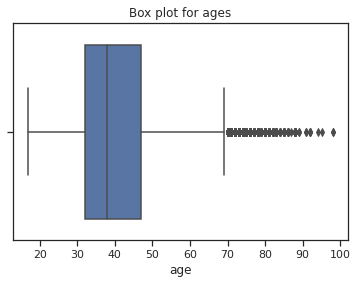

In [ ]:
# A box plot for the customer ages.
IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)
outliers_max = df['age'].quantile(0.75) + 1.5 * IQR
ge_outliers_max = (df['age'] > outliers_max).sum()    # >= outliers_max count
print(f"The Customer age are usually between {df['age'].quantile(0.25):0.0f} and {df['age'].quantile(0.75):0.0f}.")
print(f'The upper whisker age is {outliers_max}. There are {ge_outliers_max} clients who is older than this.\n')

sns.boxplot(x = 'age', data = df)
plt.title('Box plot for ages')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


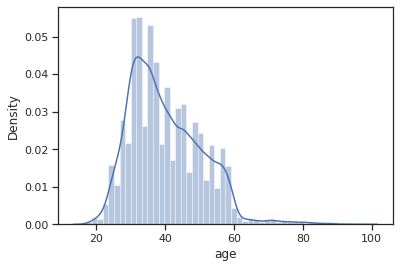

In [ ]:
sns.distplot(df['age'])

In [ ]:
print('Skewness:', df['age'].skew())
print('Kurtosis:', df['age'].kurt())

Skewness: 0.7846968157646645
Kurtosis: 0.7913115311544336


The age are moderately skewed.

The age is not following normal distribution. I think this is because from age 20 to 60 the client's ages are very various.

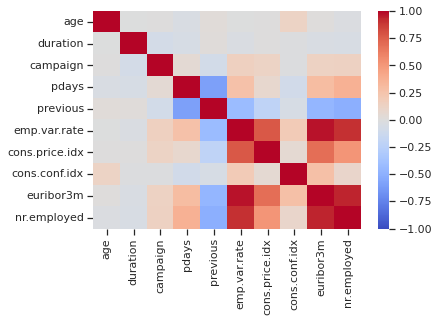

In [ ]:
# Correlations between datas, the more red -> more stronger correlation
sns.heatmap(df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1)

The heat map shows that there is not much correlation data.

The social and economic context attributes are the ones that has a stronger relationship.

In [ ]:
# For example
df['emp.var.rate'].corr(df['nr.employed'])

0.9069701012560618

There is a strong relationship between employment variation rate and the number of employees.
This means the bank's number of employees obviously follows the emp.var.rate.

This can be seem well in the plot below:



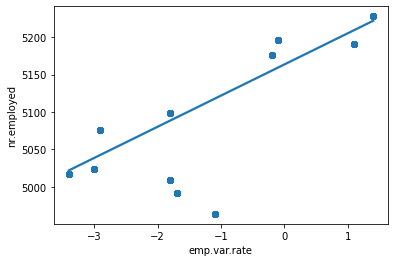

In [ ]:
sns.regplot(data = df, x = 'emp.var.rate', y = 'nr.employed')

In [ ]:
df['age'].corr(df['campaign'])

0.004593580493413423

But for example, we can see that the age and campaign has around 0 correlation, so they don't have any relationship.

We can see that also in this plot. The dots are placed randomly.

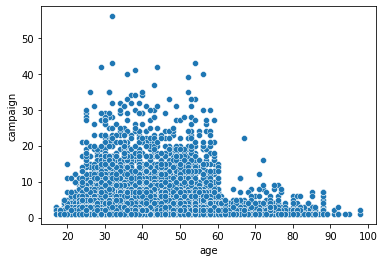

In [ ]:
sns.scatterplot(data = df, x = 'age', y = 'campaign')

## Relationship with categorical features

In [ ]:
y_binary = df['y'].map({'yes': 1, 'no': 0})
y_binary.value_counts()

0    36548
1     4640
Name: y, dtype: int64

(0.0, 2000.0)

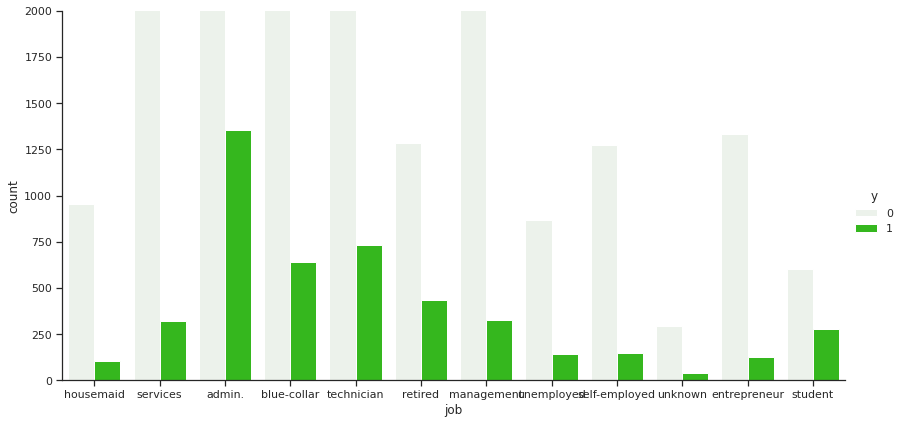

In [ ]:
data = pd.concat([df['job'], y_binary], axis = 1)
sns.catplot(x = 'job', hue = 'y', data = data, kind = 'count', height = 6, aspect = 2, color = '#23d104')   # add color to y = 1, this is the data that is important now for us.
plt.ylim(0, 2000)

Here we can see that in most cases admins subscribed a term deposit.

The lowest rate except the unknown is the housemaid.

(0.0, 2000.0)

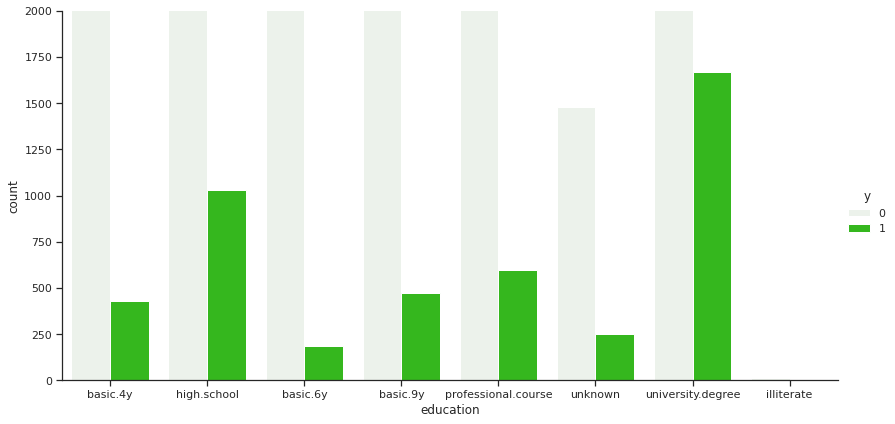

In [ ]:
data['education'] = df['education']
sns.catplot(x = 'education', hue = 'y', data = data, kind = 'count', height = 6, aspect = 2, color = '#23d104')
plt.ylim(0, 2000)

University degree has the highest rate who subscribed a term deposit.

Obviously, illiterate clients have the lowest.

(0.0, 1000.0)

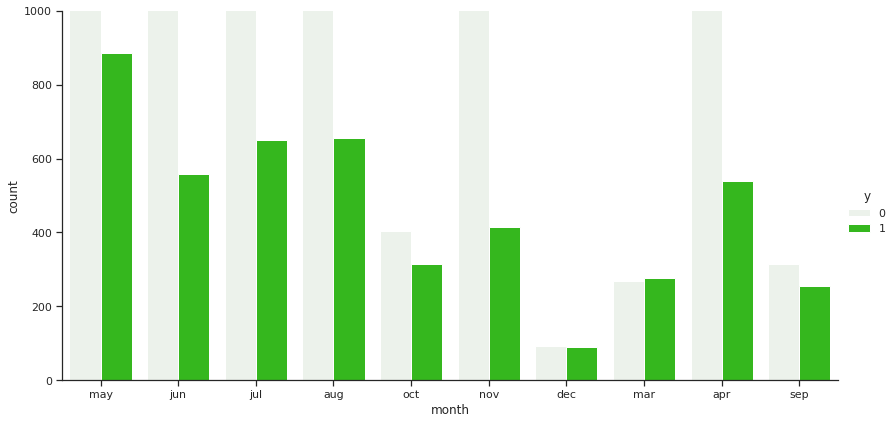

In [ ]:
data['month'] = df['month']
sns.catplot(x = 'month', hue = 'y', data = data, kind = 'count', height = 6, aspect = 2, color = '#23d104')
plt.ylim(0, 1000)

Most subscriptions were made in May. The fewest in December.

## Relationship with numerical variables

(-0.5, 1.5, 0.0, 100.0)

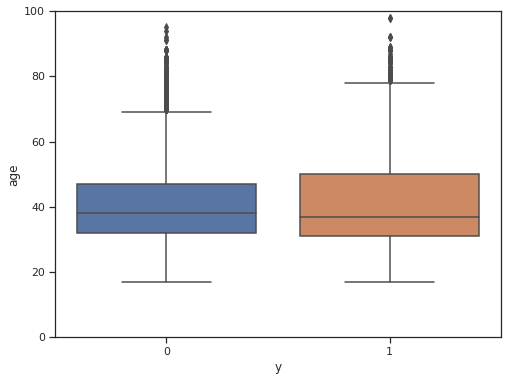

In [ ]:
data['age'] = df['age']
fig, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(y = 'age', x = 'y', data = data)
fig.axis(ymin = 0, ymax = 100)

The variance is bigger who subscribed.

(-0.5, 1.5, 0.0, 1000.0)

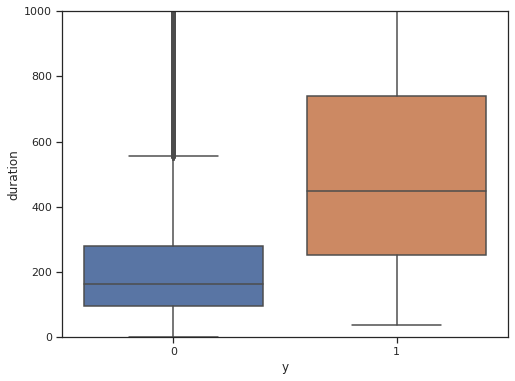

In [ ]:
data['duration'] = df['duration']
fig, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(y = 'duration', x = 'y', data = data)
fig.axis(ymin = 0, ymax = 1000)

In the past, the subscription made more likely if the duration was in range between ~250 and ~750.

In [ ]:
(df['duration'][df['y'] == 'yes']).describe()

count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

# DP

## Deal with unknown values

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

It seems there is 0 NaN values, but there is some 'unknown' value in the Dataframe. Let's count them, and see, which column has it.

In [ ]:
(df.values=='unknown').sum()

12718

In [ ]:
# Change 'unknown' to np.nan, since it will be easier to work with them
df.replace('unknown', np.nan, inplace = True)
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = False)

total

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [ ]:
# missing data column and rate
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent
default,8597,20.872584
education,1731,4.202680
housing,990,2.403613
loan,990,2.403613
job,330,0.801204
marital,80,0.194231


Default feature has the most unknown value rate.

In [ ]:
 # Convert 'no' and 'yes' values to True and False
df['default'] = df['default'].map({'yes': True, 'no': False})
df['housing'] = df['housing'].map({'yes': True, 'no': False})
df['loan'] = df['loan'].map({'yes': True, 'no': False})
df['y'] = df['y'].map({'yes': True, 'no': False})

print(df.dtypes)
# They will be dtype = object, because of the 'nan' values

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    bool
dtype: object


In [ ]:
df['y'].value_counts()

False    36548
True      4640
Name: y, dtype: int64

4640 client subscribed a term deposit.

In [ ]:
# Let's see the variances.
df.var().sort_values()

<ipython-input-33-c7335b909a15>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var().sort_values()


default               0.000092
y                     0.099966
loan                  0.131275
previous              0.244927
housing               0.248656
cons.price.idx        0.335056
emp.var.rate          2.467915
euribor3m             3.008308
campaign              7.672975
cons.conf.idx        21.420215
age                 108.602451
nr.employed        5220.283250
pdays             34935.687284
duration          67225.728877
dtype: float64

Default has a very low variance. Dive in deeper in that feature.

In [ ]:
print(df.default.value_counts())
print('Number of unknown values:', df.default.isna().sum())

False    32588
True         3
Name: default, dtype: int64
Number of unknown values: 8597


There is 32588 False, and only 3 (!) True value, ~8600 unknown. This data is quasi constant in my opinion. Don't deal with it, let's just drop this column.

In [ ]:
df = df.drop('default', axis = 1)

**Duration, pdays and nr.employed have a huge variance. Check those features.**

Duration

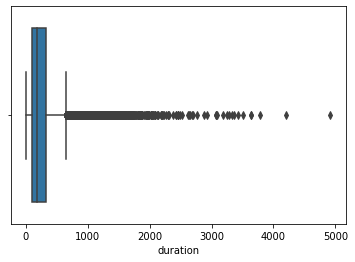

In [ ]:
# A box plot for the duration
sns.boxplot(x = 'duration', data = df)

This boxplot not seems good. There is a lot of outliers. But this is unknown before the prediction of feature 'y', so I just drop this column.

In [ ]:
df = df.drop('duration', axis = 1)

Pdays

Let's deal with the 999 values of the pdays feature.
This is because there is a lot of '999' value, which represents the new clients.

In [ ]:
# Percentage of '999' values
(df.pdays == 999).sum() / df.pdays.count()

0.9632174419733903

96.32% of clients was not previously contacted.

In [ ]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [ ]:
# Replace the 999 values to NaN, so we can see actual previous day values.
# Later, we can fill the n.a. values with the mean (I think it's better than the mode, because there is a lot of 3, 4, 6)
# The mode is 3, but the mean is 6.

df['pdays'] = df['pdays'].replace(999, np.nan)

In [ ]:
df['pdays'].describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

In [ ]:
df.pdays.mean()

6.014521452145215

In [ ]:
(df['pdays'] > 7).value_counts()

False    40850
True       338
Name: pdays, dtype: int64

In [ ]:
(df['pdays'] > 7).sum() / (df['pdays'] > 0).sum()

0.22533333333333333

There is 338 client, who's number of days that passed by after contacted from a previous campaign is over one week.
That is 22.53%. I change this value to a binary value.

In [ ]:
df['pdaysBinary'] = df['pdays'].apply(lambda x: x < 7)
df['pdaysBinary'].unique()

array([False,  True])

nr.employed

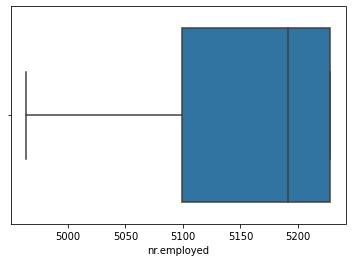

In [ ]:
# Box plot for number of employees
sns.boxplot(x = 'nr.employed', data = df)

In [ ]:
df['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [ ]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

nr.employed seems to be correct, the high variance is because of the high numbers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


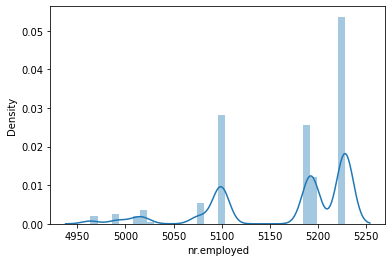

In [ ]:
sns.distplot(df['nr.employed'])

The bank had 4950-5250 employees from May 2008 to November 2010.

## Imputers, Scalers, Encodings

In [ ]:
continious_features = df.select_dtypes('number').columns
categorical_features = df.select_dtypes(np.object).columns

<ipython-input-50-c5fdd05cc78b>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(np.object).columns


In [ ]:
# Check how mean imputer would look like
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=True)

imputed_mean_data = pd.DataFrame(imputer_mean.fit_transform(df[continious_features]), columns=continious_features)
imputed_mean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000000,38.000000,47.000000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000000,2.000000,3.000000,56.000
pdays,41188.0,6.014521,0.733337,0.000,6.014521,6.014521,6.014521,27.000
previous,41188.0,0.172963,0.494901,0.000,0.000000,0.000000,0.000000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800000,1.100000,1.400000,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075000,93.749000,93.994000,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700000,-41.800000,-36.400000,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344000,4.857000,4.961000,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100000,5191.000000,5228.100000,5228.100


In [ ]:
print(df['pdays'].isna().sum())
print(imputed_mean_data['pdays'].isna().sum())

39673
0


In [ ]:
print(df.pdays.describe(), '\n\n')
print(imputed_mean_data.pdays.describe())

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64 


count    41188.000000
mean         6.014521
std          0.733337
min          0.000000
25%          6.014521
50%          6.014521
75%          6.014521
max         27.000000
Name: pdays, dtype: float64


**The mean imputation is kinda ruined the statistics, so I'm not sure if this is correct.**

In [ ]:
imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=True)

imputed_freq_data = pd.DataFrame(imputer_freq.fit_transform(df[categorical_features]), columns=categorical_features)
imputed_freq_data[df[categorical_features].isna().sum(axis=1) > 0].head()

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
7,blue-collar,married,university.degree,False,False,telephone,may,mon,nonexistent
10,blue-collar,married,university.degree,False,False,telephone,may,mon,nonexistent
26,technician,married,university.degree,True,False,telephone,may,mon,nonexistent
29,admin.,married,university.degree,True,False,telephone,may,mon,nonexistent
30,admin.,married,university.degree,False,False,telephone,may,mon,nonexistent


In [ ]:
# How MinMax scaler would look like
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
print(pd.DataFrame(min_max_scaler.fit_transform(imputed_mean_data), columns=continious_features).head(), '\n\n')
print(df.head())

        age  campaign    pdays  previous  emp.var.rate  cons.price.idx  \
0  0.481481       0.0  0.22276       0.0        0.9375        0.698753   
1  0.493827       0.0  0.22276       0.0        0.9375        0.698753   
2  0.246914       0.0  0.22276       0.0        0.9375        0.698753   
3  0.283951       0.0  0.22276       0.0        0.9375        0.698753   
4  0.481481       0.0  0.22276       0.0        0.9375        0.698753   

   cons.conf.idx  euribor3m  nr.employed  
0        0.60251   0.957379     0.859735  
1        0.60251   0.957379     0.859735  
2        0.60251   0.957379     0.859735  
3        0.60251   0.957379     0.859735  
4        0.60251   0.957379     0.859735   


   age        job  marital    education housing   loan    contact month  \
0   56  housemaid  married     basic.4y   False  False  telephone   may   
1   57   services  married  high.school   False  False  telephone   may   
2   37   services  married  high.school    True  False  telephone   m

In [ ]:
# How standard scaler would look like
standard_scaler = StandardScaler()

print(pd.DataFrame(standard_scaler.fit_transform(imputed_mean_data), columns=continious_features).head(), '\n\n')
print(df.head())

        age  campaign         pdays  previous  emp.var.rate  cons.price.idx  \
0  1.533034 -0.565922 -2.422322e-15 -0.349494      0.648092        0.722722   
1  1.628993 -0.565922 -2.422322e-15 -0.349494      0.648092        0.722722   
2 -0.290186 -0.565922 -2.422322e-15 -0.349494      0.648092        0.722722   
3 -0.002309 -0.565922 -2.422322e-15 -0.349494      0.648092        0.722722   
4  1.533034 -0.565922 -2.422322e-15 -0.349494      0.648092        0.722722   

   cons.conf.idx  euribor3m  nr.employed  
0       0.886447    0.71246      0.33168  
1       0.886447    0.71246      0.33168  
2       0.886447    0.71246      0.33168  
3       0.886447    0.71246      0.33168  
4       0.886447    0.71246      0.33168   


   age        job  marital    education housing   loan    contact month  \
0   56  housemaid  married     basic.4y   False  False  telephone   may   
1   57   services  married  high.school   False  False  telephone   may   
2   37   services  married  high.school

I think standard scaler is better for this dataset, because in some feature there is a big variance, and standard scaler deals it better than MinMax scaler.

In [ ]:
pd.DataFrame(standard_scaler.fit_transform(imputed_mean_data), columns=continious_features).min()

age              -2.209365
campaign         -0.565922
pdays            -8.201678
previous         -0.349494
emp.var.rate     -2.216433
cons.price.idx   -2.374889
cons.conf.idx    -2.224953
euribor3m        -1.722351
nr.employed      -2.815697
dtype: float64

In [ ]:
pd.DataFrame(standard_scaler.fit_transform(imputed_mean_data), columns=continious_features).max()

age                5.563310
campaign          19.289818
pdays             28.616762
previous          13.794918
emp.var.rate       0.839061
cons.price.idx     2.058168
cons.conf.idx      2.939106
euribor3m          0.820853
nr.employed        0.845170
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# encode 'y' to 0 / 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['y'])

label_encoder.classes_

array([False,  True])

In [ ]:
y_encoded

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
one_hot_encoder = OneHotEncoder()

one_hot_encoded = one_hot_encoder.fit_transform(imputed_freq_data)

In [ ]:
pd.DataFrame(one_hot_encoded.todense(), columns = one_hot_encoder.get_feature_names()).head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,...,x6_oct,x6_sep,x7_fri,x7_mon,x7_thu,x7_tue,x7_wed,x8_failure,x8_nonexistent,x8_success
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
one_hot_encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree'], dtype=object),
 array([False, True], dtype=object),
 array([False, True], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object),
 array(['failure', 'nonexistent', 'success'], dtype=object)]

# DR

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

continious_features = df.select_dtypes('number').columns
categorical_features = df.select_dtypes(np.object).columns

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),                   # I think mean is a better fill than mode in these cases.
    ('scaler', StandardScaler()),
    ('variance_trsh', VarianceThreshold(threshold = 0.05))
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),         # Change every categorical NaN value with the most frequent
    ('ohe', OneHotEncoder(sparse=False))                            # One-hot encode the features
])

pipe = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical_features),
    ('num', num_pipe, continious_features)
])

<ipython-input-65-8136044b2b7a>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(np.object).columns


In [ ]:
X = pipe.fit_transform(df)

In [ ]:
print(df.shape)
print(X.shape)

(41188, 20)
(41188, 54)


## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
new_X = pca.fit_transform(X)

print(new_X.shape)

(41188, 2)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


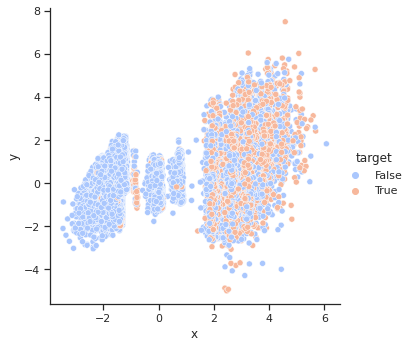

In [ ]:
plot_df = pd.DataFrame.from_records(data=new_X[:,:2],columns=["x","y"])
y = ['y']
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='coolwarm')

In this plot we can see, that if the 'x' value is above 2, the subscription is more likely to be executed.

In [ ]:
pca.explained_variance_ratio_

array([0.27744818, 0.08622483])

In [ ]:
pca.explained_variance_ratio_.sum()

0.36367300550167597

38.38% of the information is explained by the PCA.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, df['y'], test_size = 0.2, random_state = 30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8852876911871813

We get 88% accuracy on test dataset.

((Question: Is this correct? Only 2 component can predict 88% accuracy on test dataset?))

Let's see what happens, if we want to achieve 95% of useful features.

In [ ]:
pca = PCA(0.95)

X_pca = pca.fit_transform(X)
X_pca.shape

(41188, 24)

In [ ]:
pca.explained_variance_ratio_.sum()

0.9504971441643342

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, df['y'], test_size = 0.2, random_state = 30)

model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.8951201747997086

89.51% accuracy

In [ ]:
len(pca.explained_variance_ratio_)

24

We need 24 component to explain 95% of the data.

**I would select PCA DR technique, since it is very popular, and seems to be good for this data.**



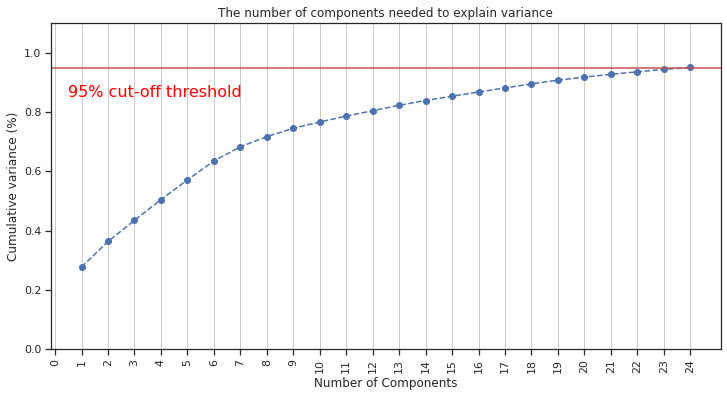

In [ ]:
number_of_ticks = len(pca.explained_variance_ratio_) + 1

fig, ax = plt.subplots(figsize=(12, 6))
x_ticks = np.arange(1, number_of_ticks, step=1)
y_values = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(x_ticks, y_values, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, number_of_ticks, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

1 component explain about 0.3

2 component explain about 0.4

......

24 component will explain 0.95 variance

##TSNE

The following plot take some time, because the dataset is large.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


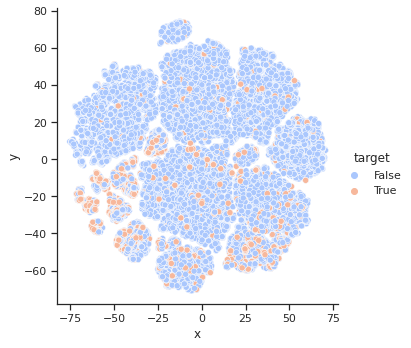

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_X = tsne.fit_transform(X)

plot_df = pd.DataFrame.from_records(data=tsne_X,columns=["x","y"])
y = ['y']
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='coolwarm')

There are some "sets of points" that "attract" true values.

## SVD

In [ ]:
from numpy.linalg import svd

U, S, VT = svd(X, full_matrices = False)

In [ ]:
print(U.shape, S.shape, VT.shape)

(41188, 54) (54,) (54, 54)


In [ ]:
print(S)

[4.06688756e+02 3.93672775e+02 2.24705317e+02 2.03988688e+02
 2.02420414e+02 1.95930100e+02 1.93563510e+02 1.67013537e+02
 1.41824568e+02 1.28212864e+02 1.10724903e+02 1.07738140e+02
 1.03783820e+02 9.91772811e+01 9.70810028e+01 9.24868941e+01
 9.09308667e+01 8.99772841e+01 8.90768125e+01 8.46035708e+01
 7.77467000e+01 7.35149394e+01 7.07648085e+01 6.88824126e+01
 6.13203268e+01 5.79676845e+01 5.50216971e+01 5.24796151e+01
 5.21908235e+01 4.90483193e+01 4.63083576e+01 4.39499194e+01
 4.05077895e+01 3.78050054e+01 3.65694675e+01 3.32236577e+01
 3.16145976e+01 2.89493277e+01 2.80099482e+01 2.66240521e+01
 2.51748151e+01 2.25994244e+01 1.39208212e+01 1.20759496e+01
 8.01431196e+00 4.55794108e+00 1.84736614e-13 8.23101296e-14
 4.13617566e-14 3.83404766e-14 3.72013445e-14 3.70111873e-14
 3.65739435e-14 1.52173395e-14]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


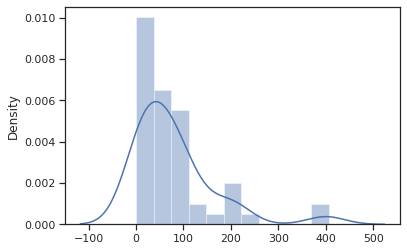

In [ ]:
# Single values
sns.distplot(S)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets

In [ ]:
X_sparse = csr_matrix(X)

In [ ]:
tsvd = TruncatedSVD(n_components = X_sparse.shape[1]-1)
X_tsvd = tsvd.fit(X)

In [ ]:
tsvd_var_ratios = tsvd.explained_variance_ratio_
print(tsvd.explained_variance_ratio_.sum())

1.0000000000001013


In [ ]:
def select_n_components(var_ratio, goal_var: float):
  total_variance = 0.0

  n_components = 0

  for explained_variance in var_ratio:
    total_variance += explained_variance
    n_components += 1

    if total_variance >= goal_var:
      break
  return n_components

In [ ]:
select_n_components(tsvd_var_ratios, 0.95)

25

Single Value Decomposition gives us that we need 25 component to achieve 0.95 variance. 

CPA gave 24.